# **PART 1: Probability Distributions**

**Relevant Question**

A start-up in Rwanda has developed a new mobile payment app. Based on their market research, they know that any given small business owner has a 25% chance of adopting the app after a demonstration. If a sales representative demonstrates the app to 12 business owners, what is the probability that exactly 3 of them will adopt it?

**Real-World Example Application**

This is a perfect real-world scenario for a Binomial Distribution:

- Fixed Number of Trials (n): There is a fixed number of demonstrations, which is 12. So, $n = 12$.
- Two Outcomes: For each demonstration, there are only two possible outcomes: the business owner adopts the app (a "success") or they do not (a "failure").
- Independent Trials: The decision of one business owner is assumed to be independent of the others.
- Constant Probability of Success (p): The probability of a business owner adopting the app is constant for each demonstration, which is 25%. So, $p = 0.25$.



**Implementation of the Binomial Formula (From Scratch)**

The Binomial Probability Mass Function (PMF) is given by the formula:
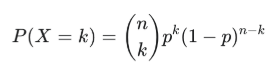

Where:

n = number of trials (12)

k = number of successes (3)

p = probability of success (0.25)

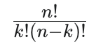

(n k​) is the binomial coefficient, calculated as:


**Step 1: Calculate the Binomial Coefficient (12 3)**

This represents the number of different ways we can choose 3 business owners out of 12.
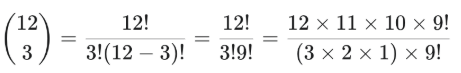
Cancel out 9!:
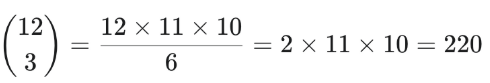

There are 220 different combinations of 3 business owners adopting the app.

**Step 2: Calculate the Probability of Successes pk**

This is the probability of 3 specific owners adopting the app.
pk=0.253= 0.15625

**Step 3: Calculate the Probability of Failures ((1-p)n-k)**

This is the probability of the other 9 owners (12 − 3 = 9) not adopting the app. The probability of failure (1 − p) is 1 − 0.25 = 0.75

**Step 4: Calculate the Final Probability P(X=3)**

Now, multiply all the parts together.

P(X=3) = 220 × 0.015625 × 0.07513

P(X=3) ≈ 0.2581

There is approximately a `25.81%` probability that exactly 3 out of the 12 business owners will adopt the app.


**Visualizing the Graph with Matplotlib**
The following Python code calculates the binomial probability for every possible outcome (from 0 to 12 adoptions) and visualizes the entire distribution in a bar chart.

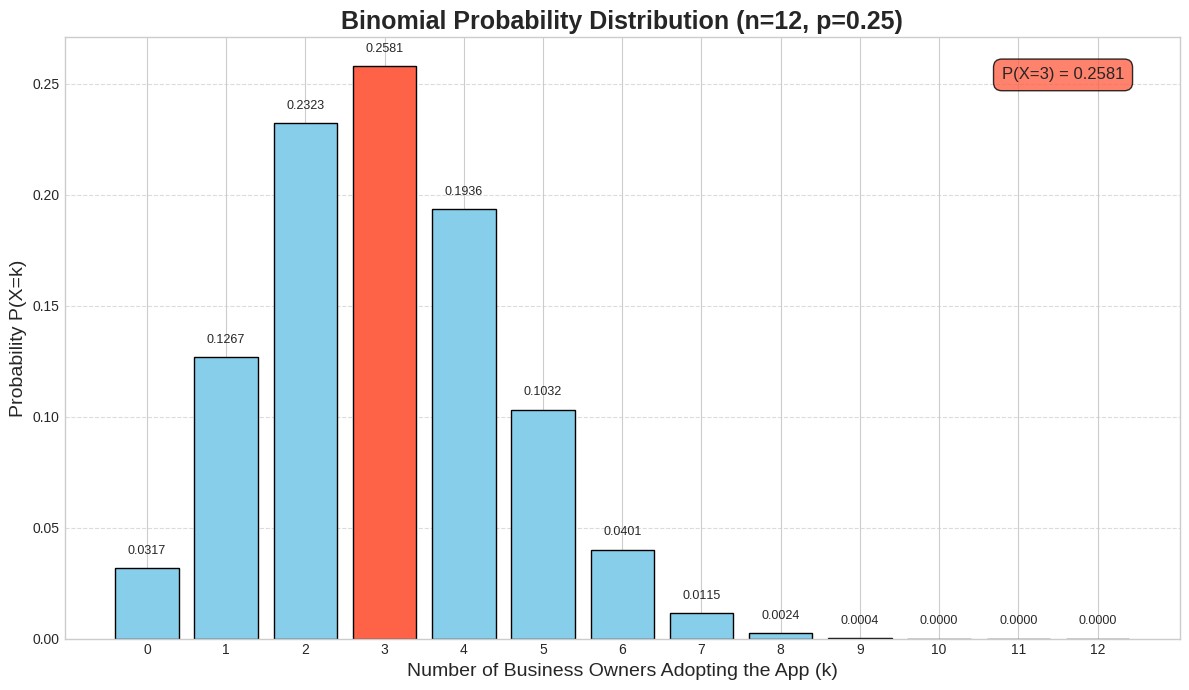

In [9]:
import matplotlib.pyplot as plt

# -- Step 1: Define the core functions from scratch --

def factorial(num):
    if num < 0:
        raise ValueError("Factorial not defined for negative numbers")
    if num == 0:
        return 1

    result = 1
    for i in range(1, num + 1):
        result *= i
    return result

def combinations(n, k):
    if k < 0 or k > n:
        return 0
    return factorial(n) // (factorial(k) * factorial(n - k))

def binomial_probability(n, k, p):
    prob_successes = p ** k
    prob_failures = (1 - p) ** (n - k)
    return combinations(n, k) * prob_successes * prob_failures

# -- Step 2: Set parameters and calculate the distribution --

n = 12  # total number of trials (business owners)
p = 0.25 # probability of a single success (adoption)
k_values = list(range(n + 1))  # Possible number of successes
probabilities = [binomial_probability(n, k, p) for k in k_values]

# -- Step 3: Visualize the distribution using Matplotlib --

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

bar_colors = ['#87CEEB' if k != 3 else '#FF6347' for k in k_values]
ax.bar(k_values, probabilities, color=bar_colors, edgecolor='black', zorder=2)

ax.set_xlabel("Number of Business Owners Adopting the App (k)", fontsize=14)
ax.set_ylabel("Probability P(X=k)", fontsize=14)
ax.set_title(f"Binomial Probability Distribution (n={n}, p={p})", fontsize=18, weight='bold')
ax.set_xticks(k_values)
ax.set_xticklabels(k_values, fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for i, prob in enumerate(probabilities):
    ax.text(i, prob + 0.005, f'{prob:.4f}', ha='center', va='bottom', fontsize=9)

answer_text = f'P(X=3) = {probabilities[3]:.4f}'
ax.text(0.95, 0.95, answer_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.5', fc='#FF6347', alpha=0.8))

plt.tight_layout()
plt.show()
